## Data Gathering

In [1]:
import pandas as pd
import qgrid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', color_codes=True)
%matplotlib inline

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/guns-data/master/full_data.csv', index_col=0)

In [3]:
print(dataset.shape)

(100798, 10)


In [4]:
dataset.index.name = 'Index'
dataset.columns = map(str.capitalize, dataset.columns)
dataset.head(5)

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [5]:
qgrid_widget = qgrid.show_grid(dataset, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
dataset_Gun = dataset
dataset_Gun.sort_values(['Year', 'Month'], inplace=True)

## Data Analysis

In [7]:
dataset_Gun.Sex.value_counts(normalize=False)

M    86349
F    14449
Name: Sex, dtype: int64

In [8]:
dataset_byGender = dataset_Gun.groupby('Sex').count()
dataset_byGender

,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86348,86349,86334,86349,86349,85028,85133


## Data Visualization

### Gun Death by Gender

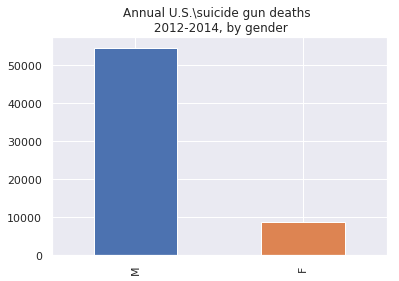

In [9]:
dataset_suicide_Gender =dataset_Gun[dataset_Gun["Intent"] =="Suicide"]
_ = dataset_suicide_Gender.Sex.value_counts(normalize=False).plot.bar(title='Annual U.S.\\suicide gun deaths \n 2012-2014, by gender')

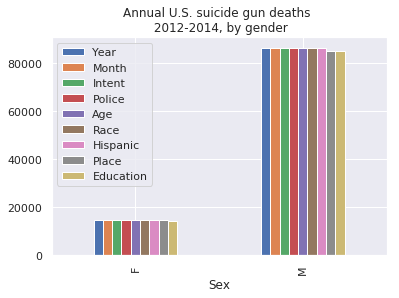

In [10]:
_ = dataset_byGender.plot.bar(title='Annual U.S. suicide gun deaths \n 2012-2014, by gender')

### Analyzing and Visualizing Gun Death Percentage by Race

In [11]:
dataset_byRace = dataset
dataset_byRace.Race.value_counts(ascending=False) * 100 / 100000

White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: Race, dtype: float64

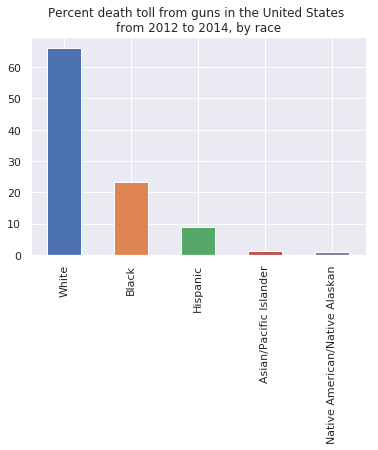

In [12]:
_ = (
    dataset_byRace.Race.value_counts(ascending=False) * 100 / 100000
).plot.bar(
    title=
    'Percent death toll from guns in the United States \nfrom 2012 to 2014, by race'
)

### Visualizing Gun Death by Cause

In [13]:
dataset_byRace.Intent.value_counts(sort =True, ascending=False)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: Intent, dtype: int64

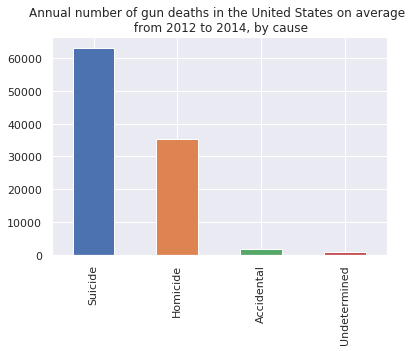

In [14]:
_ = dataset_byRace.Intent.value_counts(sort=True).plot.bar(
    title=
    'Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause'
)

### Visualizing Gun Death per 100,000 by Cause

In [15]:
dataset_byRace.Intent.value_counts(ascending=False) * 100 / 100000

Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: Intent, dtype: float64

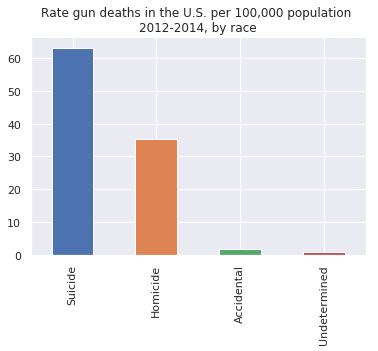

In [16]:
_ = (
    dataset_byRace.Intent.value_counts(ascending=False) * 100 / 100000
).plot.bar(
    title=
    'Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race')

### Visualizing Gun Death by Year

In [17]:
dataset_suicide = dataset[dataset["Intent"] == "Suicide"]
datasetSuicide = dataset_suicide.Year.value_counts(
    ascending=False) * 100 / 100000
datasetSuicide.sort_values(ascending=True)

2012    20.666
2013    21.175
2014    21.334
Name: Year, dtype: float64